In [2]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
#change path to where 'manuscript_data' is saved
dir_path = '/home/antonio/Repositories/manuscript_data/'
sys.path.append(dir_path+'/code/utils/')
import operator_calculations as op_calc
import delay_embedding as embed
import worm_dynamics as worm_dyn
import stats
import clustering_methods as cl

plt.rc('text', usetex=True)
plt.rc('font',size=14)

In [3]:
mat=h5py.File(dir_path+'Foraging/ForagingData/PNAS2011-DataStitched.mat','r')

refs=list(mat['#refs#'].keys())[1:]
tseries_w=[ma.masked_invalid(np.array(mat['#refs#'][ref]).T)[:,:5] for ref in refs]
mat.close()
frameRate=16.
dt=1/frameRate

# Coarse-grained estimate

In [4]:
n_clusters=1000

f = h5py.File(dir_path+'Foraging/kinetic_analysis/combined_coarse_tscales_results_{}_clusters.h5'.format(n_clusters),'r')
delay_range = np.array(f['delay_range'])
all_timps = np.array(f['timps'])
f.close()

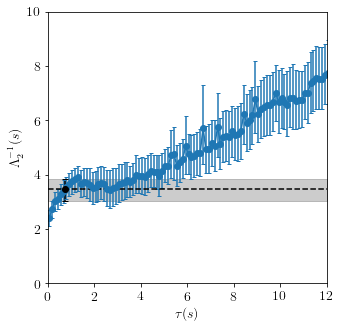

In [5]:
plt.figure(figsize=(5,5))
mean,cil,ciu = stats.bootstrap(all_timps[:,:200],n_times=5000)
plt.errorbar(delay_range[:200][::2]*dt,mean[::2],yerr = [mean[::2]-cil[::2],ciu[::2]-mean[::2]],marker='o',capsize=2)
plt.errorbar(delay_range[11]*dt,mean[11],yerr = [[mean[11]-cil[11]],[ciu[11]-mean[11]]],marker='o',capsize=3,c='k')
plt.axhline(mean[11],c='k',ls='--')
xmax=12
plt.fill_between(np.arange(0,xmax+1),np.ones(xmax+1)*cil[11],np.ones(xmax+1)*ciu[11],color='k',alpha=.2)

# plt.fill_between(delay_range*dt,cil,ciu,alpha=.5)
# plt.xscale('log')
plt.xlim(0,xmax)
plt.ylim(0,10)
# plt.axvline(0.75,ls='--',c='k')
plt.xlabel(r'$\tau (s)$')
plt.ylabel(r'$\Lambda_2^{-1}(s)$')
# plt.savefig('coarse_tscales_Foraging_{}_clusters.pdf'.format(n_clusters))
plt.show()

In [6]:
mean[11],cil[11],ciu[11]

(3.4838846, 3.034457314014435, 3.8591618180274962)

# Full P estimate

In [7]:
f = h5py.File(dir_path+'Foraging/kinetic_analysis/combined_kinetic_results_clusters_{}_simpler.h5'.format(n_clusters),'r')
idx_range = np.sort(np.array(list(f.keys()),dtype=int))
delay_range = np.arange(2,400,2)
all_timps = np.zeros((len(idx_range),len(delay_range),2))
kidx=0
for idx in idx_range:
    if len(list(f[str(idx)].keys()))>0:
        if  np.array(f[str(idx)]['timps']).sum()>0:
            all_timps[kidx] = np.array(f[str(idx)]['timps'])
            kidx+=1
f.close()

In [8]:
Lambda2 = 1/all_timps[:,:,0]+ 1/all_timps[:,:,1]

/home/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [9]:
mean,cil,ciu = stats.bootstrap(2/Lambda2,n_times=5000)

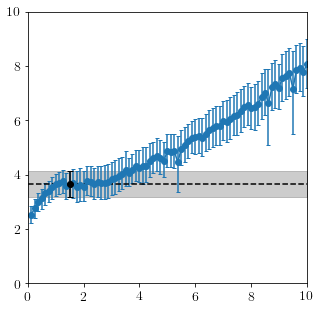

In [10]:
plt.figure(figsize=(5,5))
plt.errorbar(delay_range*dt,mean,yerr = [mean-cil,ciu-mean],marker='o',capsize=2)
plt.errorbar(delay_range[11]*dt,mean[11],yerr = [[mean[11]-cil[11]],[ciu[11]-mean[11]]],marker='o',capsize=3,c='k')
plt.axhline(mean[11],c='k',ls='--')
xmax=10
plt.fill_between(np.arange(0,xmax+1),np.ones(xmax+1)*cil[11],np.ones(xmax+1)*ciu[11],color='k',alpha=.2)

# plt.fill_between(delay_range*dt,cil,ciu,alpha=.5)
# plt.xscale('log')
plt.xlim(0,xmax)
plt.ylim(0,10)
# plt.axvline(0.75,ls='--',c='k')
plt.show()